In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
import os

In [4]:
df = pd.read_csv(r'C:\Users\pc\ML\Projects\Language Detection\Language Detection.csv')

In [5]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
df.shape

(10337, 2)

In [7]:
df.Language.unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [8]:
df = df.drop_duplicates()

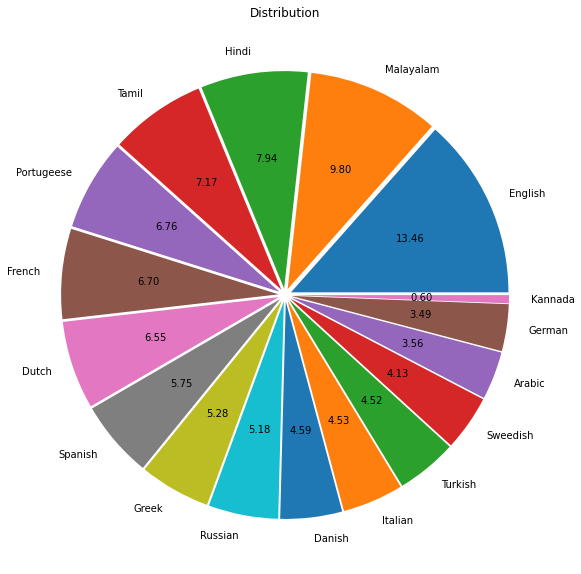

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.pie(df['Language'].value_counts(), explode = [0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,
                                                  0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,],
        labels=['English', 'Malayalam', 
        'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'],autopct="%0.2f")
plt.title('Distribution')
plt.show()

<AxesSubplot:>

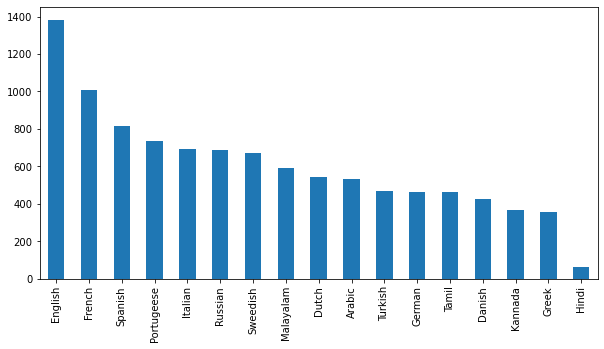

In [10]:
plt.figure(figsize=(10,5))
df.Language.value_counts().plot(kind = 'bar')

In [11]:
x = df["Text"]
y = df["Language"]


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
pickle.dump(le,open('lable_encoder.pkl','wb'))

In [12]:
data_list = []

# iterating through all the text
for text in x:         
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      # removing the symbols and numbers
    text = re.sub(r'[[]]', ' ', text)   
    text = text.lower()                                       # converting the text to lower case
    data_list.append(text)  

<ipython-input-12-76e706b2b99b>:6: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [13]:
len(data_list)

10271

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 18000) # tokenize a collection of text documents
x = cv.fit_transform(data_list).toarray()

In [15]:
import pickle
pickle.dump(cv,open('cv.pkl','wb'))

In [16]:
x.shape

(10271, 18000)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8216, 18000)
(2055, 18000)
(8216,)
(2055,)


In [19]:
from sklearn.naive_bayes import MultinomialNB  #classifier is suitable for classification with discrete features
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [20]:
y_pred = model.predict(x_test)

from sklearn.metrics import *
print('Accuracy Score = ',accuracy_score(y_test,y_pred))
print('precision Score = ',precision_score(y_test,y_pred,average='weighted'))

Accuracy Score =  0.9795620437956204
precision Score =  0.9806906510421856


In [21]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [22]:
predict('How are you')

The langauge is in English


In [23]:
import pickle
pickle.dump(model,open('lang.pkl','wb'))

In [ ]:
import pickle
lang = pickle.load(open(r'C:\Users\Administrator\ML\Projects\Language Detection\lang.pkl','rb'))
cv = pickle.load(open(r'C:\Users\Administrator\ML\Projects\Language Detection\cv.pkl','rb'))
le = pickle.load(open(r'C:\Users\Administrator\ML\Projects\Language Detection\lable_encoder.pkl','rb'))

In [14]:
def predict(text):
             x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
             lan = lang.predict(x) # predicting the language
             lan = le.inverse_transform(lan) # finding the language corresponding the the predicted value
             print("The langauge is in",lan[0]) # printing the language

In [15]:
predict('how are you')

The langauge is in English
